# **Faktor apakah yang mempengaruhi sebuah penjualan mobil?**
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

##  Pendahuluan  <a id='intro'></a>
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Dalam proyek kali ini, kami lakukan adalah mengidentifikasi faktor-faktor yang memiliki pengaruh terhadap harga kendaraan. Proses ini dimulai dengan tahap eksplorasi data, termasuk penanganan nilai-nilai yang hilang. Kami juga memeriksa dan melakukan perbaikan pada tipe data yang tidak sesuai jika ditemukan, serta mengidentifikasi dan menghapus data yang duplikat. Selanjutnya, kami menjalani tahap khusus untuk memeriksa dan menangani outlier dalam data. Terakhir, analisis data dilakukan menggunakan histogram, dan kesimpulan akhir ditarik dari hasil analisis ini.

### Tujuan: 

Tujuan dari proyek ini adalah untuk melakukan analisis data eksplorasi sederhana untuk menemukan pola menarik yang 
dapat menjawab pertanyaan:

* Temuan apa saja yang menarik dari situs web iklan ini?
* Faktor-faktor apakah yang dapat membuat mobil terjual?

### Tahapan

Data disimpan pada File path: `/datasets/vehicles_us.csv` dan proyek ini memiliki 2 tahapan diantaranya:
1.  Pra-pemrosesan
2. Exploratory Data Analysis


## Pra-pemrosesan

In [36]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

[Muat data proyek ini dan baca informasi umumnya.]

In [37]:
# Muat file data menjadi DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- `date_posted` — tanggal iklan ditayangkan- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [38]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [39]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [40]:
# tampilkan sampel data
data.sample(frac=0.1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
13467,21900,2015.0,toyota tacoma,excellent,6.0,gas,80600.0,automatic,truck,black,1.0,2019-02-24,72
44612,26000,2017.0,ram 1500,good,8.0,gas,40862.0,automatic,truck,NaN,1.0,2019-04-19,17
5765,6495,2005.0,honda odyssey,excellent,6.0,gas,NaN,automatic,mini-van,red,NaN,2018-06-21,45
11224,16995,2018.0,dodge grand caravan,excellent,6.0,gas,45677.0,automatic,van,NaN,NaN,2018-12-20,9
11657,10999,2006.0,ram 1500,excellent,8.0,gas,98402.0,automatic,truck,blue,1.0,2018-11-13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,11995,2012.0,chevrolet suburban,good,8.0,gas,163100.0,automatic,SUV,NaN,1.0,2018-05-06,35
20310,17495,2012.0,cadillac escalade,good,8.0,gas,150194.0,automatic,SUV,black,NaN,2019-03-06,55
27768,3995,2011.0,chevrolet impala,good,6.0,gas,167893.0,automatic,sedan,black,NaN,2018-07-08,33
49172,11900,2007.0,chevrolet suburban,good,8.0,gas,107000.0,automatic,wagon,custom,1.0,2018-11-19,7



    
Berdasarkan dari informasi umum dan sampel data yang ditampilkan terdapat beberapa data yang memerlukan penyelidikan lebih lanjut diantaranya:

1. data di kolom `model_year` harus diperbaiki karena nilai tahun memiliki koma
2. data di kolom `condition` harus dirubah dari nilai string ke skala numerik
3. terdapat missing value pada 5 kolom (model_year, cylinders, odometer, paint_color, is_4wd
4. merubah nilai NaN pada kolom `is_4wd` kedalam bentuk false
    


In [41]:
# melakukan pengecekan pada kolom dengan tipe data yang tidak sesuai

data.loc[:, ['model_year', 'condition', 'cylinders', 'date_posted']]

,model_year,condition,cylinders,date_posted
0,2011.0,good,6.0,2018-06-23
1,NaN,good,6.0,2018-10-19
2,2013.0,like new,4.0,2019-02-07
3,2003.0,fair,8.0,2019-03-22
4,2017.0,excellent,4.0,2019-04-02
...,...,...,...,...
51520,2013.0,like new,6.0,2018-10-03
51521,2002.0,salvage,4.0,2018-11-14
51522,2009.0,excellent,4.0,2018-11-15
51523,2013.0,good,4.0,2018-07-02


In [42]:
# nilai hilang terhadap keseluruhan data

data.isnull().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64


ada 5 kolom dengan keterangan nilai hilang dan kolom yang paling banyak nilai hilang adalah kolom `is_4wd` dengan 50% nilai hilang, akan tetapi nilai tersebut akan diganti dengan nilai boolean false
    


In [43]:
# Persentase nilai hilang terhadap keseluruhan data

report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


**Kesimpulan dan Langkah-Langkah Selanjutnya**


    
1. Kolom `is_4wd` bertipe Boolean sehingga untuk nilai yang hilang akan diganti dengan False
2. Melakukan pengecekan nilai yang hilang terhadap ke-empat kolom serta melakukan perubahan dari hasil yang akan ditemukan berdasarkan hasil pengecekan
3. Kolom `days_posted` akan diganti menjadi tipe datetime.
4. Kolom `condition` akan ditambahkan kolom skala numerik untuk memudahkan analisis.
    



### Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

[Pelajari nilai yang hilang untuk setiap kolom secara lebih detail dan tentukan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis.]

In [44]:
#memeriksa distribusi pada kolom is_4wd

data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [45]:
# memeriksa nilai yang hilang pada kolom is_4wd

data['is_4wd'].isna().sum()

25953

In [46]:
# mengganti nilai yang hilang pada kolom is_4wd,
# missing value akan diganti dengan nilai 0

data['is_4wd'] = data['is_4wd'].fillna(0)

In [47]:
# memeriksa distribusi is_4wd yang sudah diganti nilainya

data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [48]:
# memeriksa distribusi nilai unique pada kolom paint_color

data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [49]:
# memeriksa nilai yang hilang pada kolom paint_color

data['paint_color'].isna().sum()

9267

In [50]:
# merubah nilai yang hilang pada kolom paint_color dengan nilai 'unknown'

data['paint_color'] = data['paint_color'].fillna('unknown')

In [51]:
# memeriksa kembali nilai yang hilang pada kolom paint_color

data['paint_color'].isna().sum()

0

In [52]:
# memeriksa distribusi nilai unique pada kolom paint_color

data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [53]:
# mengganti nilai yang hilang di kolom model_year dengan nilai median

def group_fillna(dataframe, group_col, missing_col, agg='median'):
    if agg == 'mode':
        aggvalue = pd.pivot_table(dataframe, columns=group_col, values=missing_col, aggfunc=lambda x: x.mode().iat[0])
    else:
        aggvalue = pd.pivot_table(dataframe, columns=group_col, values=missing_col, aggfunc=agg)

    for col in aggvalue.columns:
        dataframe.loc[(dataframe[group_col]==col) & (dataframe[missing_col].isnull()), missing_col] = aggvalue[col][0]

    return dataframe

In [54]:
data = group_fillna(dataframe=data, group_col='model', missing_col='model_year', agg='mode')

In [55]:
# memeriksa nilai yang hilang pada kolom model_year

data['model_year'].isna().sum()

0

In [56]:
# mengganti nilai yang hilang di kolom odometer dengan nilai median

data.loc[data['odometer'].isna(), 'odometer'] = data['odometer'].median()

In [57]:
# memeriksa nilai yang hilang pada kolom model_year

data['odometer'].isna().sum()

0

In [58]:
# mengganti nilai yang hilang di kolom cylinders dengan nilai median

data.loc[data['cylinders'].isna(), 'cylinders'] = data['cylinders'].median()

In [59]:
# memeriksa nilai yang hilang pada kolom cylinders

data['cylinders'].isna().sum()

0

In [60]:
# memeriksa kembali data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Kesimpulan untuk nilai yang hilang**

berdasarkan hasil analisis terhadap nilai yang hilang, terdapat nilai-nilai yang hilang diantaranya terdapat pada kolom `is_4wd`, `paint_color`, `odometer`, `cylinders`, dan `model_year`. penanganan terdahap nilai yang hilang pada masing-masing kolom adalah sebagai berikut:

1. kolom `is_4wd` berdasarkan data adalah sebuah nilai boolean, nilai yang hilang kita asumsikan adalah nilai false, maka dari itu nilai yang hilang diisi oleh nilai 0
2. kolom `paint_color` memiliki nilai yang hilang sebanyak 9267, nilai yang hilang kita masukan kedalam kategori nilai unknown, karena kita tidak tahu penjual mobil menjual mobil dengan warna apa
3. mengisi nilai hilang pada kolom `model_year` dengan menggunakan nilai median berdasarkan model mobil, karena ini adalah data umum dimana kendaraan tahun berapapun bisa diposting disini
4. sama seperti `model_year`, nilai hilang pada kolom `odometer` dan `cylinders` diisi oleh nilai median karena banyak variasi mobil yang diposting disini dengan model apapun, untuk itu sebaiknya menggunakan nilai median

### Memperbaiki Tipe Data

In [61]:
# mengganti format kolom date_posted 

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [62]:
# mengganti tipe data model_year ke int

data['model_year'] = data['model_year'].astype(int)

In [63]:
# mengganti tipe data cylinders ke int

data['cylinders'] = data['cylinders'].astype(int)

In [64]:
# mengganti format kolom price ke float

data['price'] = data['price'].astype(float)

In [65]:
# mengganti format kolom is_4wd ke boolean

data['is_4wd'] = data['is_4wd'].astype('bool')

In [67]:
# melakukan pengecekan dari tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


**Kesimpulan memperbaiki tipe data**

dalam memperbaiki tipe data, ada beberapa data yang memiliki format tipe data yang salah diantaranya `date_posted`, `model_year`, dan `cylinders`. maka dari itu kami akan melakukan perubahan tipe data menjadi tipe data yang sesuai guna mempermudah proses analisis nantinya

1. merubah Kolom `date_posted` menjadi tipe data datetime untuk memungkinkan analisis waktu yang lebih baik.
2. `cylinders` dan `model_year`akan diubah menjadi tipe data integer karena mereka kemungkinan besar berisi variabel bilangan bulat.
3. merubah kolom `price` menjadi tipe data float memungkinkan adanya nilai desimal dalam kolom `price`
4. merubah kolom `is_4wd` menjadi kolom boolean, karena nilai `is_4wd` adalah nilai boolean

Dengan melakukan konversi tipe data ini, data akan lebih sesuai dengan jenis informasi yang disimpan dalam masing-masing kolom, sehingga memudahkan analisis dan pemrosesan lebih lanjut.

### Memperbaiki Kualitas Data

In [69]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan

data['day_posted'] = data['date_posted'].dt.day
data['month_posted'] = data['date_posted'].dt.month
data['year_posted'] = data['date_posted'].dt.year
data['weekday_posted'] = data['date_posted'].dt.weekday

In [70]:
# Tambahkan usia kendaraan saat iklan ditayangkan

data['car_age'] = (data['year_posted'] - data['model_year']).astype(int) + 1

In [71]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 

data['odo_year'] = data['odometer'] / data['car_age']

In [72]:
# membuat fungi untuk skala condition

def condition_change(value):
    if value == 'salvage':
        result = 0
    elif value == 'fair':
        result = 1
    elif value == 'good':
        result = 2
    elif value == 'excellent':
        result = 3
    elif value == 'like new':
        result = 4
    elif value == 'new':
        result = 5
    return result

In [73]:
# menambahkan condition_category ke kolom baru untuk skala condition

data['condition'] = data['condition'].apply(condition_change)

**Kesimpulan dalam memperbaiki kualitas data**

Dalam memperbaiki kualitas data guna memudahkan analisis. Berikut kesimpulan memperibaiki kualitas data:

1. Memecah tanggal iklan ditayangkan menjadi komponen waktu seperti hari `day_posted`, bulan `month_posted`, tahun `year_posted`, dan hari dalam seminggu `weekday_posted`. Hal ini membantu dalam analisis berdasarkan pola waktu.

2. Tambahkan Usia Kendaraan Saat Iklan Ditayangkan: Dalam langkah ini, dihitung usia kendaraan `car_age` saat iklan ditayangkan dengan mengurangkan tahun posting dengan tahun model mobil. Ini dapat membantu dalam memahami seberapa tua kendaraan saat dijual.

3. Tambahkan Jarak Tempuh Rata-rata Kendaraan per Tahun: Dalam langkah ini, dihitung jarak tempuh rata-rata per tahun `odo_year` dengan membagi odometer oleh usia kendaraan. Ini dapat memberikan informasi tentang tingkat pemakaian kendaraan.

4. Membuat Fungsi untuk Skala Condition: Dalam langkah ini, dibuat sebuah fungsi `condition_change` yang mengonversi nilai dalam kolom `condition` menjadi skala angka yang lebih terstruktur. Hal ini akan membantu dalam analisis yang melibatkan kondisi kendaraan.

Kesimpulannya, langkah-langkah ini bertujuan untuk meningkatkan kualitas data, membuat data lebih informatif, dan memungkinkan analisis yang lebih baik. Selain itu, perubahan ini membantu dalam menghadapi potensi masalah seperti nilai null yang mungkin timbul dalam proses perhitungan.

### Memeriksa Data yang Sudah Bersih

In [74]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  float64       
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  day_posted      51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [75]:
# tampilkan sampel data 

data.sample(frac=0.1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,weekday_posted,car_age,odo_year
27645,7500.0,2004,ford f-250 super duty,3,8,gas,73600.0,automatic,pickup,unknown,False,2018-10-14,42,14,10,2018,6,15,4906.666667
29277,16500.0,2017,chevrolet equinox,3,4,gas,37508.0,automatic,SUV,grey,False,2018-08-04,13,4,8,2018,5,2,18754.000000
40079,42995.0,2018,chevrolet suburban,3,8,gas,40800.0,automatic,SUV,unknown,True,2018-07-12,53,12,7,2018,3,1,40800.000000
50200,2500.0,2016,honda civic,3,6,gas,35000.0,automatic,sedan,unknown,False,2018-06-01,54,1,6,2018,4,3,11666.666667
25553,10250.0,2014,chevrolet silverado 1500,3,6,gas,121203.0,automatic,truck,white,False,2018-11-06,15,6,11,2018,1,5,24240.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,13500.0,2011,jeep grand cherokee,3,8,gas,117938.0,automatic,SUV,black,True,2018-11-10,43,10,11,2018,5,8,14742.250000
2250,8995.0,2006,chevrolet silverado 2500hd,3,8,gas,140610.0,automatic,truck,unknown,True,2018-08-15,15,15,8,2018,2,13,10816.153846
6844,6500.0,2010,ford escape,3,6,gas,124000.0,automatic,SUV,grey,True,2018-06-17,22,17,6,2018,6,9,13777.777778
20612,4600.0,2004,ford expedition,2,8,gas,90000.0,automatic,SUV,black,True,2018-05-06,40,6,5,2018,6,15,6000.000000


## Exploratory Data Analysis

Parameternya adalah :
- `price`
- `car_age`
- `odo_year`
- `cylinders`
- `condition`

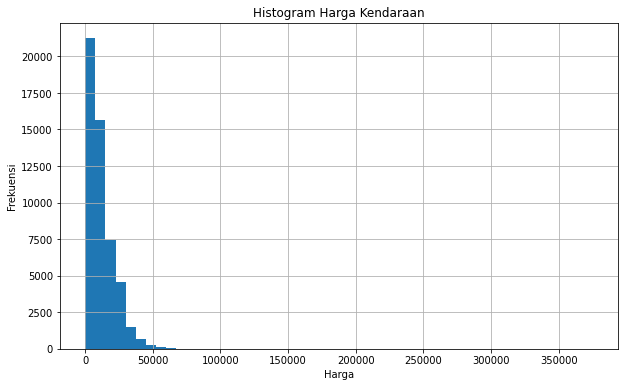

In [76]:
# membuat histogram dari kolom price

data['price'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram Harga Kendaraan')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

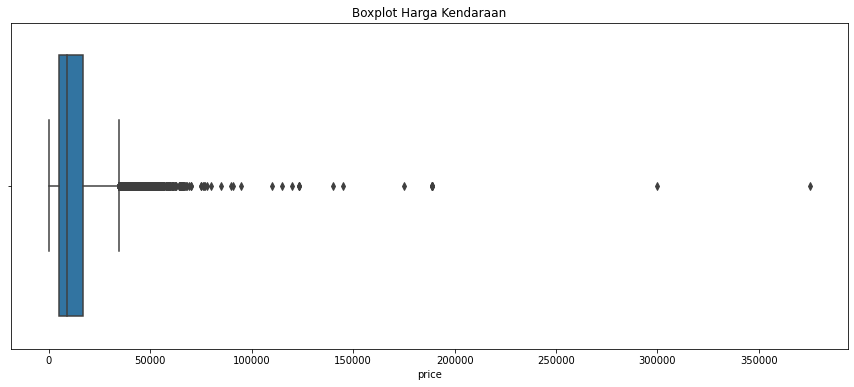

In [81]:
# Membuat boxplot untuk melihat outlier dari kolom price

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='price')
plt.title('Boxplot Harga Kendaraan')
plt.show()


**Penjelasan kolom price**

Dilihat dari histogram diatas dan diyakinkan lagi dengan boxplot, memang benar bahwa kolom price memiliki outlier sampai angka lebih dari 350000. Hal ini terjadi mungkin karena harga kendaraan yang bervariasi yang diiklankan di website, dimana user bebas memasang iklan dengan harga berapapun.

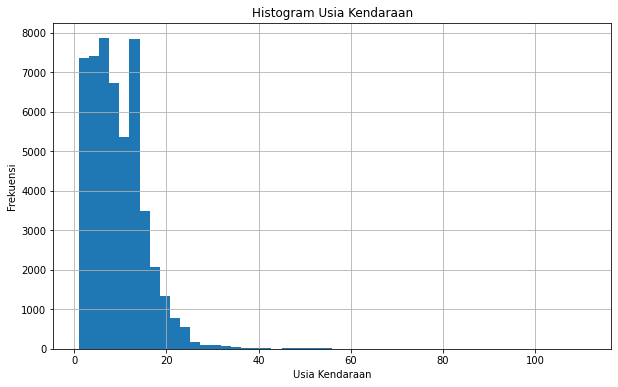

In [82]:
# membuat histogram untuk car_age

data['car_age'].hist(bins=50, figsize=(10,6))
plt.title('Histogram Usia Kendaraan')
plt.xlabel('Usia Kendaraan')
plt.ylabel('Frekuensi')
plt.show()

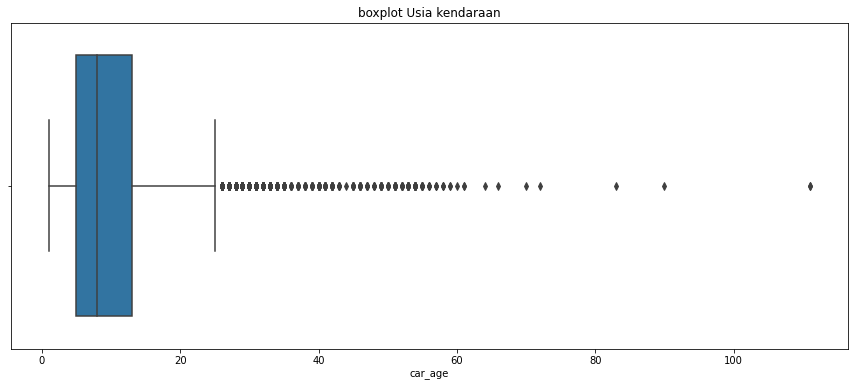

In [83]:
# membuat boxplot untuk car_age

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='car_age')
plt.title('boxplot Usia kendaraan')
plt.show()

**Penjelasan kolom car_age**

kolom car_age terlihat memiliki outlier hingga 100 tahun. karena ini adalah sebuah website ada banyak faktor yang dapat mempengaruhi outlier tersebut bisa saja ini sebuah mobil klasik.



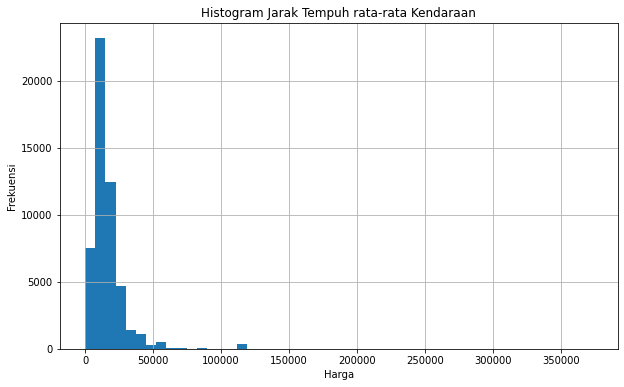

In [84]:
# membuat histogram untuk odo_year

data['odo_year'].hist(bins=50, figsize=(10,6))
plt.title('Histogram Jarak Tempuh rata-rata Kendaraan')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

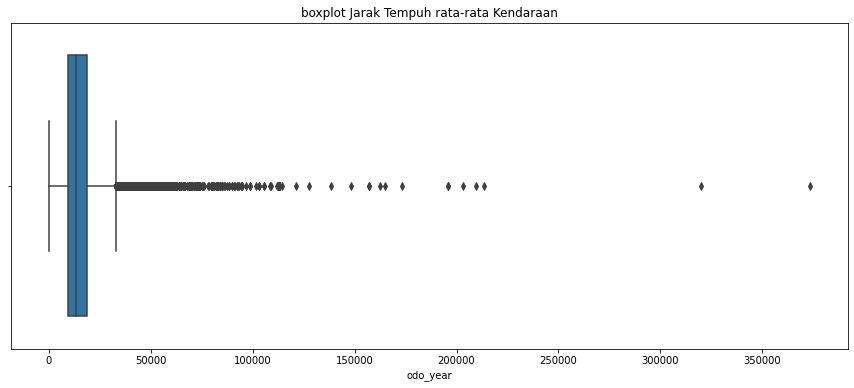

In [85]:
# membuat boxplot untuk kolom odo_year

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='odo_year')
plt.title('boxplot Jarak Tempuh rata-rata Kendaraan')
plt.show()

**Penjelasan kolom odo_year**

kolom odomoter juga memiliki outlier. Asumsi kita hal ini terjadi karena jenis kendaraan yang diiklankan di website bervariasi, dimana semakin lama umur kendaraan maka biasanya odometernya juga sudah tinggi.


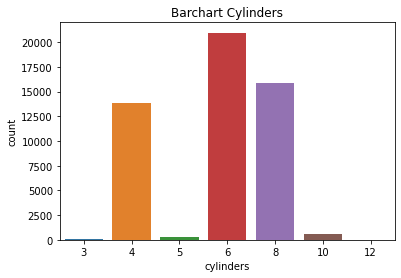

In [86]:
# membuat barchart untuk kolom cylinders

sns.countplot(data=data, x='cylinders')
plt.title('Barchart Cylinders')
plt.show()

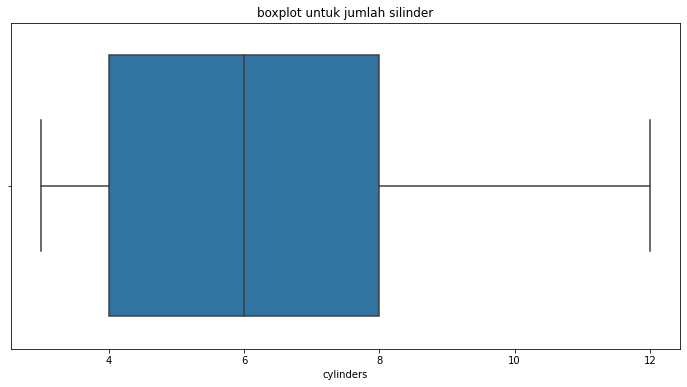

In [45]:
# membuat boxplot untuk kolom cylinders

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cylinders')
plt.title('boxplot untuk jumlah silinder')
plt.show()

**Penjelasan kolom cylinders**
    
Dari boxplot diatas, terlihat jelas bahwa kolom silinder tidak memiliki outlier. Hal ini karena kendaraan yang diiklankan informasinya sudah sesuai, yaitu kendaraan biasanya bermesin 3 sampai dengan 12 silinder
    


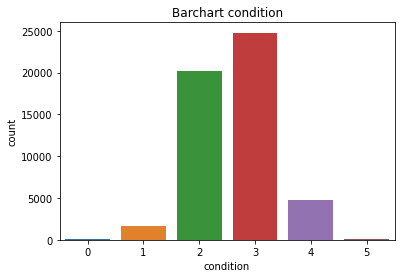

In [87]:
# membuat barchart untuk kolom condition

sns.countplot(data=data, x='condition')
plt.title('Barchart condition')
plt.show()

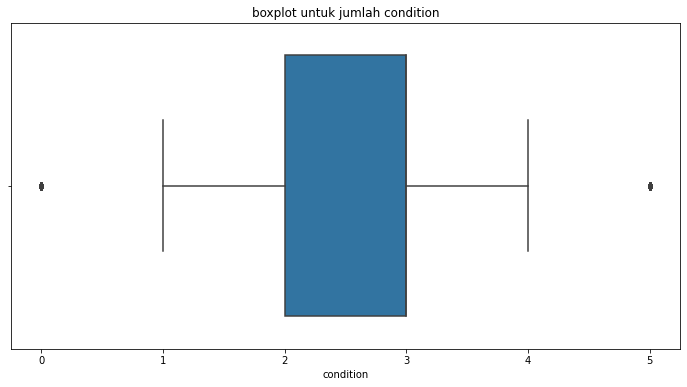

In [88]:
# membuat boxplot untuk kolom condition

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='condition')
plt.title('boxplot untuk jumlah condition')
plt.show()

**Penjelasan kolom cylinders**

kolom kondisi kendaraan tidak memiliki outlier. Karena kita sudah tahu bahwa skala kondisi kendaraan adalah 1 sampai dengan 5 dengan masing-masing keterangan: new = 5 like new = 4 excellent = 3 good = 2 fair = 1 salvage = 0

### Mempelajari dan Menangani Outlier
    
Dengan hasil di atas, ditemukan bahwa kolom `price`, `car_age`, dan `odo_year` mengandung outlier. kami akan mencoba membuat beberapa DataFrame terpisah tanpa outlier tersebut. Sebelumnya, kita akan mengidentifikasinya dengan menentukan batas bawah/atas untuk rentang nilai normal.
    


In [89]:
# membuat function untuk menghitung untuk menghitung dan mengembalikan nilai lower_whisker dan upper_whisker

def upper_lower_whisker(series):
    Q1  = series.quantile(.25)
    Q3  = series.quantile(.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

In [90]:
def outlier_cleansing(dataframe, column):

    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper_check == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe

    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe

### Mempelajari Parameter Inti Tanpa Outlier


====== [START] cleaning outlier in price column ====== 

lower values : -12758.5
upper values : 34597.5


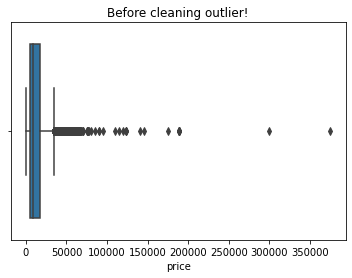

lower_check values : -11362.5
upper_check values : 32257.5


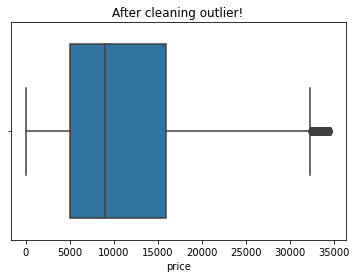


====== [FINISHED] outlier in [price] column has been clear! ====== 


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


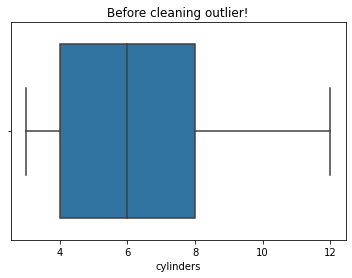

lower_check values : -2.0
upper_check values : 14.0


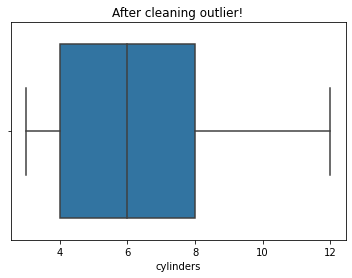


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 


====== [START] cleaning outlier in car_age column ====== 

lower values : -7.0
upper values : 25.0


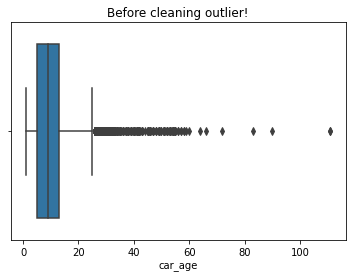

lower_check values : -7.0
upper_check values : 25.0


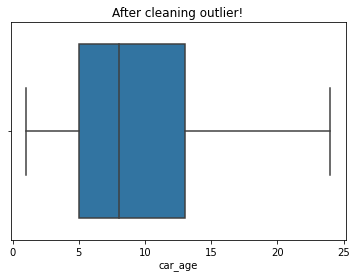


====== [FINISHED] outlier in [car_age] column has been clear! ====== 


====== [START] cleaning outlier in odo_year column ====== 

lower values : -4395.454545454546
upper values : 32637.272727272728


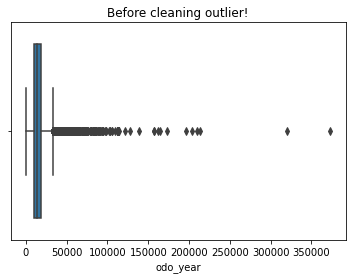

lower_check values : -2619.4852941176505
upper_check values : 29432.475490196084


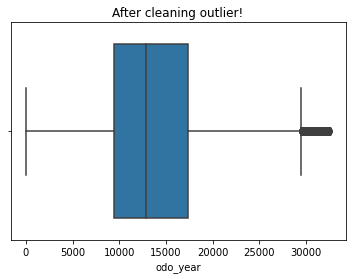


====== [FINISHED] outlier in [odo_year] column has been clear! ====== 


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


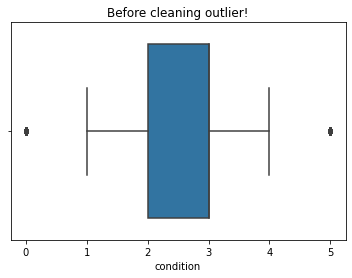

lower_check values : 0.5
upper_check values : 4.5


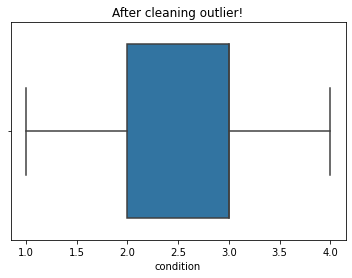


====== [FINISHED] outlier in [condition] column has been clear! ====== 



In [91]:

df_final = data.copy()
list_of_selected_column = ['price', 'cylinders', 'car_age', 'odo_year', 'condition']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    df_final = outlier_cleansing(dataframe=df_final, column=column)

**Kesimpulan Mengenai Outlier**

Outliear pada kolom `price`, dan `odo_year` mengalami pembersihan outlier sehingga tidak ada lagi data outlier di kedua kolom tersebut. sementara kolom `car_age`, `cylinders`, dan `condition`  tidak mengalami perubahan karena nilai batas bawah dan atas tidak mengalami perubahan. Pembersihan outlier ini bertujuan untuk membersihkan data yang ekstrem atau tidak sesuai dengan distribusi umum, sehingga meningkatkan kualitas data untuk analisis lebih lanjut.

### Masa Berlaku Iklan 

In [92]:
# menghitung mean dan median

print('Median durasi listing :', data['days_listed'].median())
print('Mean durasi listing   :', data['days_listed'].mean())

Median durasi listing : 33.0
Mean durasi listing   : 39.55475982532751


In [93]:
# melihat describe pada kolom days_listed

data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64


1. Rata-rata iklan ditayangkan adalah 39 hari dan mediannya 33 hari.
2. sebuah iklah ditayangkan selama 28 hari, terlihat dari standar deviasi.
3. waktu tercepat iklan dihapus adalah 19 hari, sementara iklan terlama sampai 271 hari


### Harga Rata-Rata Setiap Jenis Kendaraan

Berdasarkan hasil analisis tersebut dapat simpulkan bahwa jumlah iklan SUV dan Truck memiliki jumlah iklan yang paling banyak, SUV dengan jumlah iklan sebanyak 12405 dan truck sebanyak 12353 iklan. Namun harga rata-rata SUV lebih rendah dibandingkan dengan harga rata-rata Truck


,ads,mean_price
type,,
SUV,12405,11149.400000
truck,12353,16734.894924
sedan,12154,6965.358647
pickup,6988,16057.410418
coupe,2303,14353.442901
wagon,1541,9088.134328
mini-van,1161,8193.177433
hatchback,1047,6868.513849
van,633,10546.941548


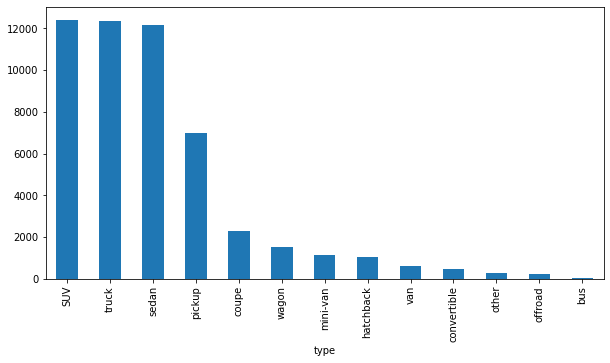

In [94]:
report = (data.groupby(['type']).agg({'model': 'count', 'price': 'mean'})
                       .rename(columns = {'model': 'ads', 'price': 'mean_price'})
                       .sort_values(by = 'ads', ascending = False))
report.head(25)['ads'].plot(kind = 'bar', figsize = (10,5))
report

In [95]:
# analisa 2 jenis kendaraan teratas

top_2_types = report.head(2).reset_index()
print(top_2_types)

    type    ads    mean_price
0    SUV  12405  11149.400000
1  truck  12353  16734.894924


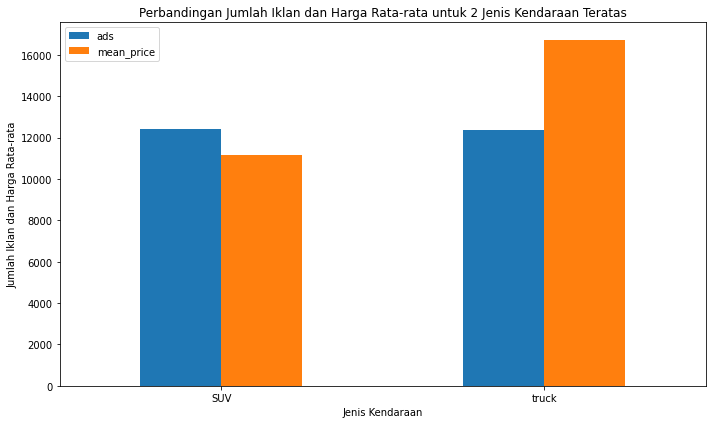

In [96]:
top_2_types.plot(x='type', y=['ads', 'mean_price'], kind='bar', figsize=(10, 6))
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Jumlah Iklan dan Harga Rata-rata')
plt.title('Perbandingan Jumlah Iklan dan Harga Rata-rata untuk 2 Jenis Kendaraan Teratas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Faktor Harga

Berdasarkan analisis dibawah ini terkait perbandingan antara mobil SUV dan mobil Sedan:

1. Hubungan Harga dengan Usia Kendaraan (car_age):
    * SUV: Korelasi antara harga (price) dan usia mobil (car_age) di SUV adalah -0,541233, menunjukkan korelasi negatif yang sedang. Ini berarti semakin tua SUV, harga cenderung lebih rendah.
    * Sedan: Korelasi antara harga (price) dan usia mobil (car_age) di Sedan adalah -0,559912, menunjukkan korelasi negatif yang sedang. Ini juga berarti semakin tua Sedan, harga cenderung lebih rendah. Korelasi ini hampir sama kuat antara keduanya.


2. Hubungan Harga dengan Jumlah Mil yang Telah Ditempuh (Odometer):
    * SUV: Korelasi antara harga (price) dan odometer di SUV adalah -0,466757, menunjukkan korelasi negatif yang sedang. Ini berarti semakin tinggi jumlah mil yang telah ditempuh oleh SUV, harga cenderung lebih rendah.
    * Sedan: Korelasi antara harga (price) dan odometer di Sedan adalah -0,480184, menunjukkan korelasi negatif yang sedang. Ini juga berarti semakin tinggi jumlah mil yang telah ditempuh oleh Sedan, harga cenderung lebih rendah. Korelasi ini hampir sama kuat antara keduanya.


3. Hubungan Harga dengan Kondisi Kendaraan (condition):
    * SUV: Korelasi antara harga (price) dan kondisi mobil di SUV adalah 0,273043, menunjukkan korelasi positif yang lemah. Ini berarti mobil SUV dalam kondisi lebih baik cenderung memiliki harga yang lebih tinggi.
    * Sedan: Korelasi antara harga (price) dan kondisi mobil di Sedan adalah 0,298803, juga menunjukkan korelasi positif yang lemah. Ini berarti mobil Sedan dalam kondisi lebih baik cenderung memiliki harga yang lebih tinggi. Korelasi ini hampir sama kuat antara keduanya.


4. Hubungan Harga dengan Kondisi Kendaraan (transmission):
    * SUV dan Sedan dengan jenis transmisi automatic menjadi jenis kendaraan yang paling mahal harganya (melihat dari banyaknya outlier). ini berarti memilih kendaraan automatic akan semakin mahal harganya dibandingkan jenis transmisi lainnya


5. Hubungan Harga dengan Warna (paint_color):
    * SUV: banyak harga penjualan mobil yang tinggi dengan warna tidak diketahui disusul dengan warna hitam dan putih 
    * Sedan: harga mobil yang paling mahal adalah dengan warna custom, dapat diasumsikan warna custom lebih menarik dibandingkan dengan warna tanpa custom
    
Dalam perbandingan ini, kami melihat bahwa SUV dan Sedan memiliki pola korelasi yang serupa terhadap faktor-faktor harga, usia kendaraan, jumlah mil yang telah ditempuh, kondisi kendaraan, transmisi, dan warna. Keduanya menunjukkan tren yang serupa dalam hubungan antara faktor-faktor ini dengan harga kendaraan. Korelasi negatif yang lebih kuat adalah hubungan antara usia kendaraan dan harga, yang berarti semakin tua kendaraan, harga cenderung lebih rendah. Sedangkan korelasi positif yang lemah adalah hubungan antara kondisi kendaraan yang lebih baik dan harga yang lebih tinggi.

**Analisa Kendaraan SUV**

In [97]:
# Filter data untuk jenis kendaraan SUV

data_SUV = data.loc[data['type'].isin(['SUV']) & (data['price'] <= 34597.5)]
data_SUV.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,weekday_posted,car_age,odo_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,5,8,18125.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,7,1,2019,0,7,15639.000000
8,11500.0,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,16,7,2018,0,7,14882.000000
9,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,15,2,2019,4,12,12265.916667
14,12990.0,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,31,1,2019,3,11,12025.909091


In [98]:
# Menghitung korelasi antara harga dengan variabel numerik (usia, jarak tempuh, kondisi)

numeric_variable_SUV = data_SUV[['price', 'car_age', 'odometer', 'condition']]
numeric_corr_SUV = numeric_variable_SUV.corr()
numeric_corr_SUV

,price,car_age,odometer,condition
price,1.000000,-0.541233,-0.466757,0.273043
car_age,-0.541233,1.000000,0.497952,-0.307641
odometer,-0.466757,0.497952,1.000000,-0.304898
condition,0.273043,-0.307641,-0.304898,1.000000


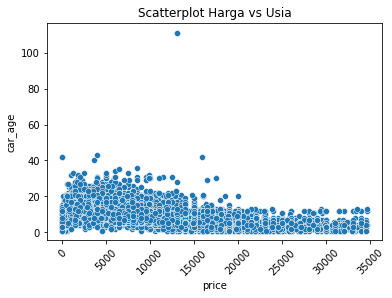

In [58]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Usia mobil

sns.scatterplot(data=numeric_variable_SUV, x='price', y='car_age')
plt.title('Scatterplot Harga vs Usia')
plt.xticks(rotation=45)
plt.show()

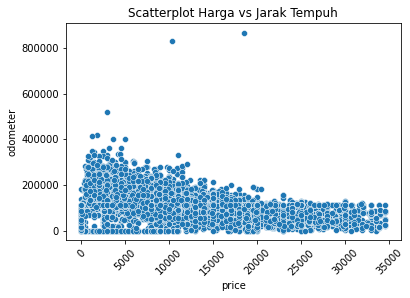

In [99]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Jarak tempuh

sns.scatterplot(data=numeric_variable_SUV, x='price', y='odometer')
plt.title('Scatterplot Harga vs Jarak Tempuh')
plt.xticks(rotation=45)
plt.show()

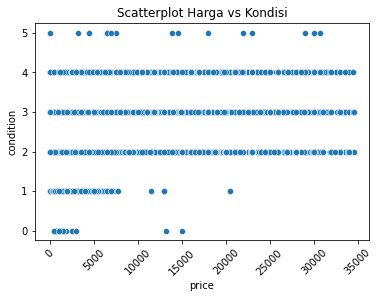

In [100]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Kondisi

sns.scatterplot(data=numeric_variable_SUV, x='price', y='condition')
plt.title('Scatterplot Harga vs Kondisi')
plt.xticks(rotation=45)
plt.show()

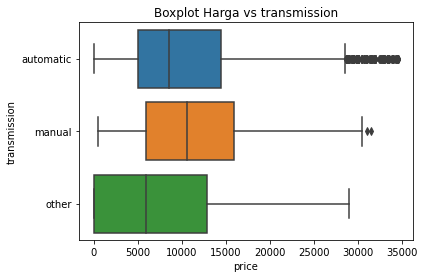

In [101]:
# Buat boxplot untuk tipe transmisi

sns.boxplot(data=data_SUV, x='price', y='transmission')
plt.title('Boxplot Harga vs transmission')
plt.show()

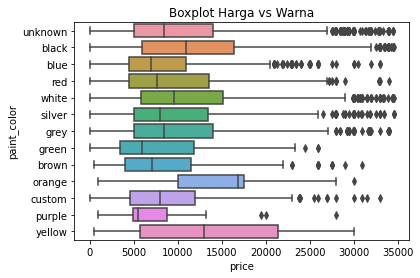

In [102]:
# Membuat boxplot untuk melihat korelasi antara harga dengan variabel kategorik - warna

sns.boxplot(data=data_SUV, x='price', y='paint_color')
plt.title('Boxplot Harga vs Warna')
plt.show()

**Analisa Kendaraan Sedan**

In [104]:
# Filter data untuk jenis kendaraan sedan

data_sedan = data.loc[data['type'].isin(['sedan']) & (data['price'] <= 34597.5)]
data_sedan.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,weekday_posted,car_age,odo_year
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,3,7,15714.285714
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,1,3,26967.666667
5,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,20,6,2018,2,5,11590.800000
6,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,27,12,2018,3,4,19803.000000
11,8990.0,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,28,3,2019,3,8,13892.750000


In [105]:
# Menghitung korelasi antara harga dengan variabel numerik (usia, jarak tempuh, kondisi)

numeric_variable_sedan = data_sedan[['price', 'car_age', 'odometer', 'condition']]
numeric_corr_sedan= numeric_variable_sedan.corr()
numeric_corr_sedan


,price,car_age,odometer,condition
price,1.000000,-0.559912,-0.480184,0.298803
car_age,-0.559912,1.000000,0.467866,-0.286950
odometer,-0.480184,0.467866,1.000000,-0.288152
condition,0.298803,-0.286950,-0.288152,1.000000


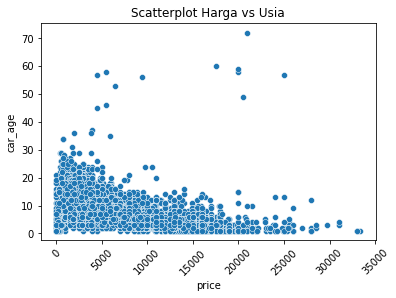

In [106]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Usia mobil

sns.scatterplot(data=numeric_variable_sedan, x='price', y='car_age')
plt.title('Scatterplot Harga vs Usia')
plt.xticks(rotation=45)
plt.show()

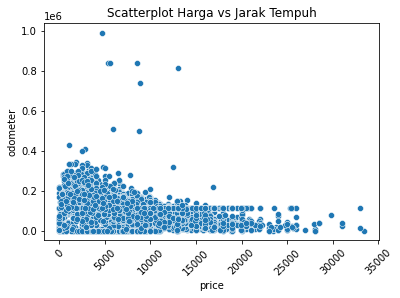

In [107]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Jarak tempuh

sns.scatterplot(data=numeric_variable_sedan, x='price', y='odometer')
plt.title('Scatterplot Harga vs Jarak Tempuh')
plt.xticks(rotation=45)
plt.show()

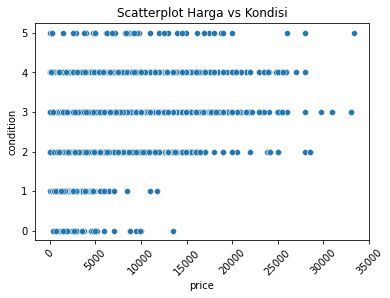

In [67]:
# matrix scatter plot untuk melihat korelasi antara harga dengan Kondisi

sns.scatterplot(data=numeric_variable_sedan, x='price', y='condition')
plt.title('Scatterplot Harga vs Kondisi')
plt.xticks(rotation=45)
plt.show()

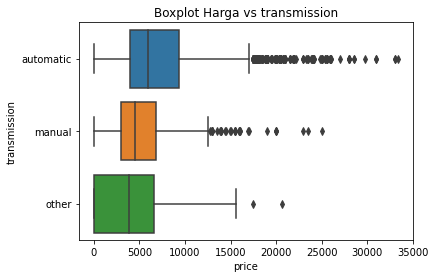

In [68]:
# Buat boxplot untuk tipe transmisi

sns.boxplot(data=data_sedan, x='price', y='transmission')
plt.title('Boxplot Harga vs transmission')
plt.show()

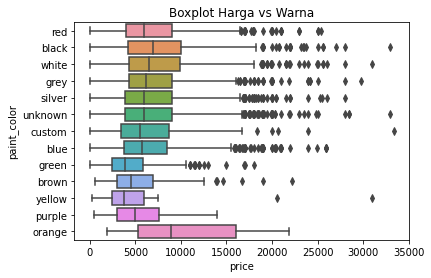

In [69]:
# Membuat boxplot untuk melihat korelasi antara harga dengan variabel kategorik - warna

sns.boxplot(data=data_sedan, x='price', y='paint_color')
plt.title('Boxplot Harga vs Warna')
plt.show()

## Kesimpulan Umum

Kesimpulan dari proyek ini adalah untuk melakukan analisa guna menjawab pertanyaan mengenai faktor apakah yang menjual sebuah mobil?

dari hasil analisa yang sudah dilakukan, kami menemukan temuan tentang penjualan sebuah mobil yang menarik diantaranya:

1. Durasi Iklan: Rata-rata iklan ditayangkan selama 39 hari dengan median 33 hari. Durasi iklan berkisar dari 19 hingga 271 hari, dengan standar deviasi sekitar 28 hari. Ini berarti sebagian besar iklan mobil dihapus dalam waktu sekitar 1 bulan.

2. Harga Rata-rata Berdasarkan Jenis Kendaraan: Berdasarkan jenis kendaraan, harga rata-rata tertinggi dimiliki oleh kategori "bus" (sekitar 17.135,67) dan "truck" (sekitar 16.734,89), sedangkan "hatchback" memiliki harga rata-rata lebih rendah (sekitar 6.868.51).

kemudian faktor-faktor yang mempengaruhi harga kendaraan antara kendaraan SUV dan kendaraan Sedan:

1. Hubungan Harga dengan Usia Kendaraan:
    * SUV: Korelasi antara harga dan usia mobil di SUV adalah -0,541233, menunjukkan korelasi negatif yang sedang. Ini berarti semakin tua SUV, harga cenderung lebih rendah.
    * Sedan: Korelasi antara harga dan usia mobil di Sedan adalah -0,559912, menunjukkan korelasi negatif yang sedang. Ini juga berarti semakin tua Sedan, harga cenderung lebih rendah. Korelasi ini sebanding antara SUV dan Sedan.


2. Hubungan Harga dengan Jumlah Mil yang Telah Ditempuh (Odometer):
    * SUV: Korelasi antara harga dan odometer di SUV adalah -0,466757, menunjukkan korelasi negatif yang sedang. Ini berarti semakin tinggi jumlah mil yang telah ditempuh oleh SUV, harga cenderung lebih rendah.
    * Sedan: Korelasi antara harga dan odometer di Sedan adalah -0,480184, menunjukkan korelasi negatif yang sedang. Ini juga berarti semakin tinggi jumlah mil yang telah ditempuh oleh Sedan, harga cenderung lebih rendah. Korelasi ini sebanding antara SUV dan Sedan.


3. Hubungan Harga dengan Kondisi Kendaraan:
    * SUV: Korelasi antara harga dan kondisi mobil di SUV adalah 0,273043, menunjukkan korelasi positif yang lemah. Ini berarti mobil SUV dalam kondisi lebih baik cenderung memiliki harga yang lebih tinggi.
    * Sedan: Korelasi antara harga dan kondisi mobil di Sedan adalah 0,298803, juga menunjukkan korelasi positif yang lemah. Ini berarti mobil Sedan dalam kondisi lebih baik cenderung memiliki harga yang lebih tinggi. Korelasi ini sebanding antara SUV dan Sedan.

Secara umum, SUV dan Sedan memiliki pola korelasi yang serupa terhadap faktor-faktor harga, usia kendaraan, jumlah mil yang telah ditempuh, dan kondisi kendaraan. Kedua jenis kendaraan menunjukkan tren yang serupa dalam hubungan antara faktor-faktor ini dengan harga kendaraan.

Rekomendasi:

1. Optimasi Durasi Iklan: Karena rata-rata iklan ditayangkan selama 39 hari, situs dapat memberikan opsi kepada pengiklan untuk mengoptimalkan durasi iklan mereka. Ini dapat membantu pengiklan menghemat biaya iklan jika mobil mereka terjual lebih cepat dari rata-rata.

2. Segmentasi Pasar: Situs dapat meningkatkan layanan mereka dengan menyediakan pilihan segmentasi pasar yang lebih baik. Hal ini dapat membantu pengiklan menargetkan audiens mereka dengan lebih efektif berdasarkan jenis kendaraan, harga, atau wilayah geografis.

3. Analisis Harga: Situs dapat memberikan alat analisis harga yang lebih baik kepada pengiklan dan pembeli. Ini dapat mencakup pembandingan harga dengan rata-rata pasar atau saran harga berdasarkan karakteristik kendaraan.

4. Pemasaran Lebih Tepat Sasaran: Dengan mengetahui jenis kendaraan yang paling diminati, seperti SUV, Truck, dan Sedan, situs dapat meningkatkan upaya pemasaran mereka untuk menarik lebih banyak iklan kendaraan tersebut.